In [1]:
import import_ipynb
from pidcontroller import PidController
from filelogger import FileLogger
from consolelogger import ConsoleLogger
from progresslogger import ProgressLogger
import functions as fn
import matplotlib.pyplot as plt
import pandas as pd

importing Jupyter notebook from pidcontroller.ipynb
importing Jupyter notebook from filelogger.ipynb
importing Jupyter notebook from consolelogger.ipynb
importing Jupyter notebook from progresslogger.ipynb
importing Jupyter notebook from functions.ipynb


In [2]:
run_time = 90 * 60
speedup = 5
kp = 6
ki = 0.08
kd = 0
out_min = 0
out_max = 100
pid = PidController(kp, ki, kd, out_min, out_max)

TCLab version 0.4.9
Simulated TCLab
TCLab Model disconnected successfully.


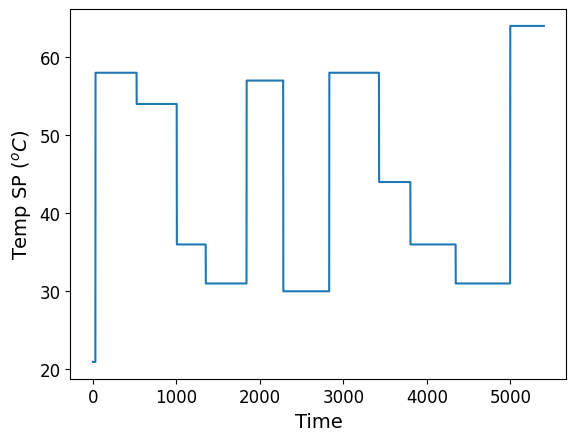

In [3]:
Tsp = fn.generate_temperature_setpoints(30, 20.95, 240, 600, 30, 70, int(run_time) + 1, seed=1)
fn.plot(Tsp, 'Time', r'Temp SP ($^oC$)')
plt.savefig('SP_profile.png');

In [4]:
loggers = [FileLogger('log.txt'), ProgressLogger(r'\d+', run_time)]
tm, T1, Q1 = fn.run(run_time, Tsp, [pid], loggers=loggers, connected=False, speedup=speedup)

  0%|                                                                                 | 1/5400 [00:00<07:20, 12.27it/s]

TCLab version 0.4.9
Simulated TCLab


100%|██████████████████████████████████████████████████████████████████████████████| 5400/5400 [01:33<00:00, 57.87it/s]

Progress Logger: pbar closed
TCLab Model disconnected successfully.


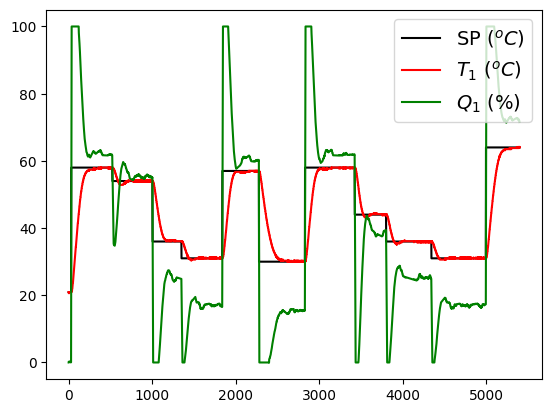

In [5]:
plt.plot(Tsp,'k-',label='SP $(^oC)$')
plt.plot(T1, 'r-',label='$T_1$ $(^oC)$')
plt.plot(Q1,'g-',label='$Q_{1}$ (%)')
plt.legend(loc='upper right',fontsize=14)

In [7]:
data = pd.DataFrame()
data['Q1'] = Q1
data['T1'] = T1
data['Tsp'] = Tsp
data.to_csv('PID_train_data.csv',index=False)